In [1]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from scipy import spatial
inloc = "images/"
outloc = "output/"

In [ ]:
# basic processing

In [28]:
im = Image.open(inloc+"apple1.jpg")

In [32]:
#0 - black
#255 - white

im_array = np.array(im)
print(im_array.shape)
print(im_array[0][0])
print(im_array[0][1499])
print(im_array[1499][0])
print(im_array[1499][1499])
# print(im_array[5][500:1000]); #top rows are white
# print("")
# print(im_array[750][500:1000]); #mid row and center columns from apple image are dominant in red

(1500, 1500, 3)
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]


In [21]:
fb = np.array([0,0,0])
array1 = im_array.copy()

replace_array = np.array([fb for pxl in range(len(array1[750]))])

array1[750] = replace_array
print(array1[750][500:1000])

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


In [25]:
img1 = Image.fromarray(array1)
img1.save(outloc+"hline.jpg")

In [57]:
test_array = im_array.copy()
print(test_array.shape)
print(test_array.T.shape)
imx = test_array.T
imx = imx.reshape(1500,1500,3)
print(imx.shape)

(1500, 1500, 3)
(3, 1500, 1500)
(1500, 1500, 3)


In [67]:
# do not make changes to the array what you iterate; define new array
# check for variables on loop and inside loop. There should not be any overlap

def img_manipulate(im_array):
    new_array = []
    for r in range(len(im_array)):
        replace_array = []
        for c in range(len(array2[r])):
            red = im_array[r][c][0]; #print(red)
            grn = im_array[r][c][1]; #print(grn)
            blu = im_array[r][c][2]; #print(blu)
            if r>=850:
                replace_array.append(np.array([grn, red, blu]))
            else:
                replace_array.append(np.array([red, grn, blu]))
        new_array.append(np.array(replace_array))
    new_array = np.array(new_array)
    return new_array


In [79]:
im = Image.open(inloc+"apple1.jpg")
imr = im.rotate(90)
imr.save(outloc+"rotate.jpg")

In [80]:
array2 = np.array(imr)
manipulated_array = img_manipulate(array2)

In [81]:
img2 = Image.fromarray(manipulated_array)
img2.save(outloc+"clr_rotate.jpg")

In [82]:
img2.rotate(-90).save(outloc+"clr_rotate_back.jpg")

In [85]:
array3 = np.array(im)
array3 = array3[400:1200][:]
img3 = Image.fromarray(array3)
img3.save(outloc+"half.jpg")

In [89]:
img3.rotate(90, expand=1).save(outloc+"half_rotate.jpg")

In [107]:
#greyscale
im_gs = im.convert('L'); #convet to grey scale image
im_gs.save(outloc+"apple_gs.jpg", "JPEG")
gs_array = np.array(im_gs)
gs_array[750][500:1000]
#[185  16  35] = 68 ; # the first cell value comes from first pixel of color image

array([ 68,  91,  88,  55,  77, 109,  98,  72,  56,  84,  95, 105,  97,
        69,  71,  56,  59,  84,  71,  72,  63,  59,  57,  58,  64,  70,
        67,  60,  67,  70,  60,  63,  78,  73,  70,  90,  77,  79,  81,
        82,  85,  74,  80, 120, 135, 134, 131, 107,  98,  94,  71,  72,
        74,  65,  64,  69,  63,  61,  63,  68,  71,  59,  62,  80,  85,
        79,  74,  69,  64,  64,  65,  70,  70,  66,  64,  65,  74,  68,
        68,  76,  84,  81,  72,  67,  78,  82,  75,  70,  73,  74,  70,
        69,  72,  80,  88,  89,  89,  88,  80,  67,  72,  74,  72,  69,
        70,  72,  71,  66,  64,  69,  67,  61,  62,  67,  66,  62,  63,
        63,  64,  64,  65,  64,  66,  65,  62,  64,  65,  64,  61,  61,
        61,  63,  63,  63,  64,  65,  68,  70,  71,  71,  68,  67,  66,
        66,  66,  70,  69,  67,  66,  64,  64,  63,  64,  65,  64,  64,
        74,  65,  64,  67,  66,  59,  59,  62,  61,  64,  64,  64,  64,
        59,  63,  83,  69,  66,  64,  64,  63,  62,  62,  67,  6

In [119]:
#bw
th=200
bw_array = gs_array.copy()
bw_array[bw_array>=th] = 255; #convert to white
bw_array[bw_array<th] = 0; #convert to black

im_bw = Image.fromarray(bw_array)
im_bw.save(outloc +"apple_bw.jpg", "JPEG")


In [109]:
f_array=gs_array.flatten()

In [111]:
from collections import Counter
print(Counter(list(f_array)))

Counter({255: 968559, 254: 27323, 253: 21311, 252: 14956, 251: 13248, 63: 9991, 94: 9841, 93: 9769, 92: 9731, 62: 9729, 95: 9727, 89: 9679, 91: 9651, 90: 9629, 64: 9624, 96: 9605, 97: 9586, 61: 9496, 88: 9453, 98: 9349, 60: 9281, 250: 9241, 99: 9131, 65: 9130, 86: 9041, 87: 9031, 100: 9006, 101: 8887, 59: 8825, 102: 8774, 104: 8773, 113: 8757, 105: 8746, 111: 8708, 107: 8690, 122: 8675, 116: 8669, 108: 8645, 103: 8641, 117: 8627, 109: 8625, 112: 8621, 120: 8620, 114: 8600, 121: 8593, 106: 8592, 118: 8588, 123: 8588, 115: 8584, 148: 8582, 85: 8571, 84: 8558, 147: 8538, 110: 8527, 119: 8526, 154: 8405, 133: 8393, 151: 8370, 155: 8334, 157: 8320, 136: 8310, 126: 8310, 132: 8301, 124: 8291, 128: 8283, 127: 8278, 162: 8270, 134: 8267, 149: 8251, 135: 8242, 161: 8233, 58: 8230, 146: 8229, 150: 8222, 138: 8219, 66: 8210, 153: 8203, 139: 8193, 144: 8193, 131: 8163, 129: 8156, 160: 8154, 158: 8142, 125: 8131, 145: 8110, 130: 8108, 137: 8104, 143: 8074, 141: 8068, 152: 8036, 142: 8035, 83: 8023,

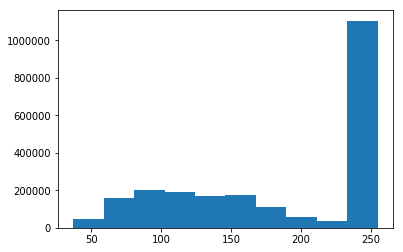

In [112]:
plt.hist(f_array); plt.show()

In [201]:
x = [[1,3,5],[2,4,6]]
x = np.array(x)
print(x)
xt = np.transpose(x); print("'")
print(xt)

[[1 3 5]
 [2 4 6]]
'
[[1 2]
 [3 4]
 [5 6]]


In [6]:
#1 . Padding image and remove background and get object only
#2 . Resizing the image for optimized processing without loosing any features of it

def get_coordinate(im_array, coordinate):
    for r in range(len(im_array)):
        myrow = im_array[r]
        black_count = len(myrow[myrow==0])
        black_ratio = black_count/len(myrow)
        if black_ratio >= 0.01:
            coordinate=r; break
    return coordinate


def pad_image(img_path, name):
    
    im = Image.open(img_path); #open the image
    
    #greyscale
    im_gs = im.convert('L'); #convet to grey scale image
    #im_gs.save(outloc+ "/"+ name + "_gs.jpg", "JPEG")
    array_gs = np.array(im_gs)
    
    #bw
    th=200
    bw_array = array_gs.copy()
    bw_array[bw_array>=th] = 255; #convert to white
    bw_array[bw_array<th] = 0; #convert to black
    
    im_bw = Image.fromarray(bw_array)
    #im_bw.save(outloc + name + "_bw.jpg", "JPEG")
    
    start_row=0; end_row=len(bw_array); start_col=0; end_col=len(bw_array[0]) 
    
    start_row = get_coordinate(bw_array, start_row)      
#     print(start_row)
    
    end_row = len(bw_array) - get_coordinate(np.flipud(bw_array), end_row)      
#     print(end_row)
    
    bw_array_t = np.transpose(bw_array)
    
    start_col = get_coordinate(bw_array_t, start_col)      
#     print(start_col)
    
    end_col = len(bw_array[0]) - get_coordinate(np.flipud(bw_array_t), end_col)      
#     print(end_col)
    
    cropped_array = array_gs[start_row:end_row, start_col:end_col]
    im_cropped = Image.fromarray(cropped_array)
    im_resized = im_cropped.resize((100,100), Image.ANTIALIAS)
    im_resized.save(outloc + name + "_cropped.jpg")
    resized_array = np.array(im_resized)
    return resized_array


def get_hist_vec(a, bin_size):   
    bins = [j for j in range(0,255,bin_size)]; 
#     print("bins: ", bins); print("")
    
    hist_a = np.histogram(a, bins=bins)
    vec_a = [0]; 
#     print("hist vec: ", vec_a); print(""); 
#     print("vec len: ", len(vec_a))
    
    return vec_a, hist_a


def cosin_sim(vec_a, vec_b):
    cosine = 1 - spatial.distance.cosine(vec_a,vec_b)
    return cosine


bin_size=20

(100, 100)
255 255 255 255
59 55 60 59


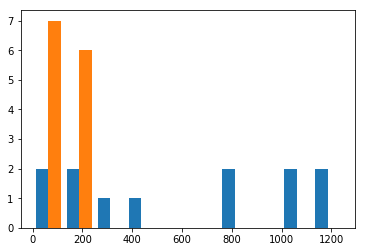

In [34]:
a1 = pad_image(inloc+"apple1.jpg", "apple1"); print(a1.shape)
# print(a1[0][0], a1[0][99], a1[99][0],a1[99][99])
# print(a1[49][49], a1[49][59], a1[59][49], a1[59][59])
# (bg-fg)/2
vec1, hist1 = get_hist_vec(a1, bin_size)
plt.hist(hist1); plt.show()

(100, 100)


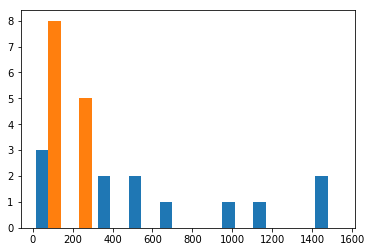

In [10]:
a2 = pad_image(inloc+"apple2.jpg", "apple2"); print(a2.shape)
vec2, hist2 = get_hist_vec(a2, bin_size)
plt.hist(hist2); plt.show()

In [264]:
cosin_sim(vec1,vec2)

0.8538247270352489

(100, 100)


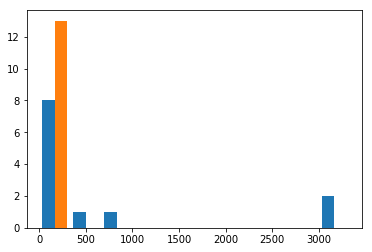

In [11]:
o1 = pad_image(inloc+"orange1.jpg", "orange1"); print(o1.shape)
vec3, hist3 = get_hist_vec(o1, bin_size)
plt.hist(hist3); plt.show()

In [266]:
cosin_sim(vec1,vec3)

0.5525498037445745

In [267]:
cosin_sim(vec2,vec3)

0.8414091844875566

In [ ]:
# apple2 and orange1 has having 84% similarity due color overlap is not acceptable comparision

In [320]:
def thresholding(th, im_array, name):
    im_array[im_array<th]=1
    im_array[im_array>=th]=0
    with open(name+".txt", "w") as f:
        for r in im_array:
            f.write(str(r)+"\n")
    return im_array

In [321]:
new1 = np.resize(a1.copy(), (30,30))
new1_array = thresholding(220, new1, "new1")
# print(new1_array)

In [322]:
new2 = np.resize(a2.copy(), (30,30))
new2_array = thresholding(220, new2, "new2")

In [323]:
new3 = np.resize(o1.copy(), (30,30))
new3_array = thresholding(220, new3, "new3")

In [324]:
# correlation is not solving the problem
np.corrcoef(new1_array.flatten(), new2_array.flatten())

array([[ 1.        , -0.05546865],
       [-0.05546865,  1.        ]])

In [338]:
def custom_similarity(array1, array2, error_rate):
    c=0
    array_len = len(array1)
    for n in range(array_len):
        x1 = len(array1[n][array1[n]==1])
        x2 = len(array2[n][array2[n]==1])
        diff = abs(x1-x2)
    #     print(diff)
        if diff < error_rate: c=c+1
    return c/array_len        

In [339]:
custom_similarity(new1_array, new2_array, 3)

0.8

In [340]:
custom_similarity(new1_array, new3_array, 3)

0.36666666666666664

In [20]:
im1 = Image.open(inloc+"apple1.jpg")
im2 = Image.open(outloc+"apple1_cropped.jpg")

In [21]:
im1.paste(im2, (750,750))

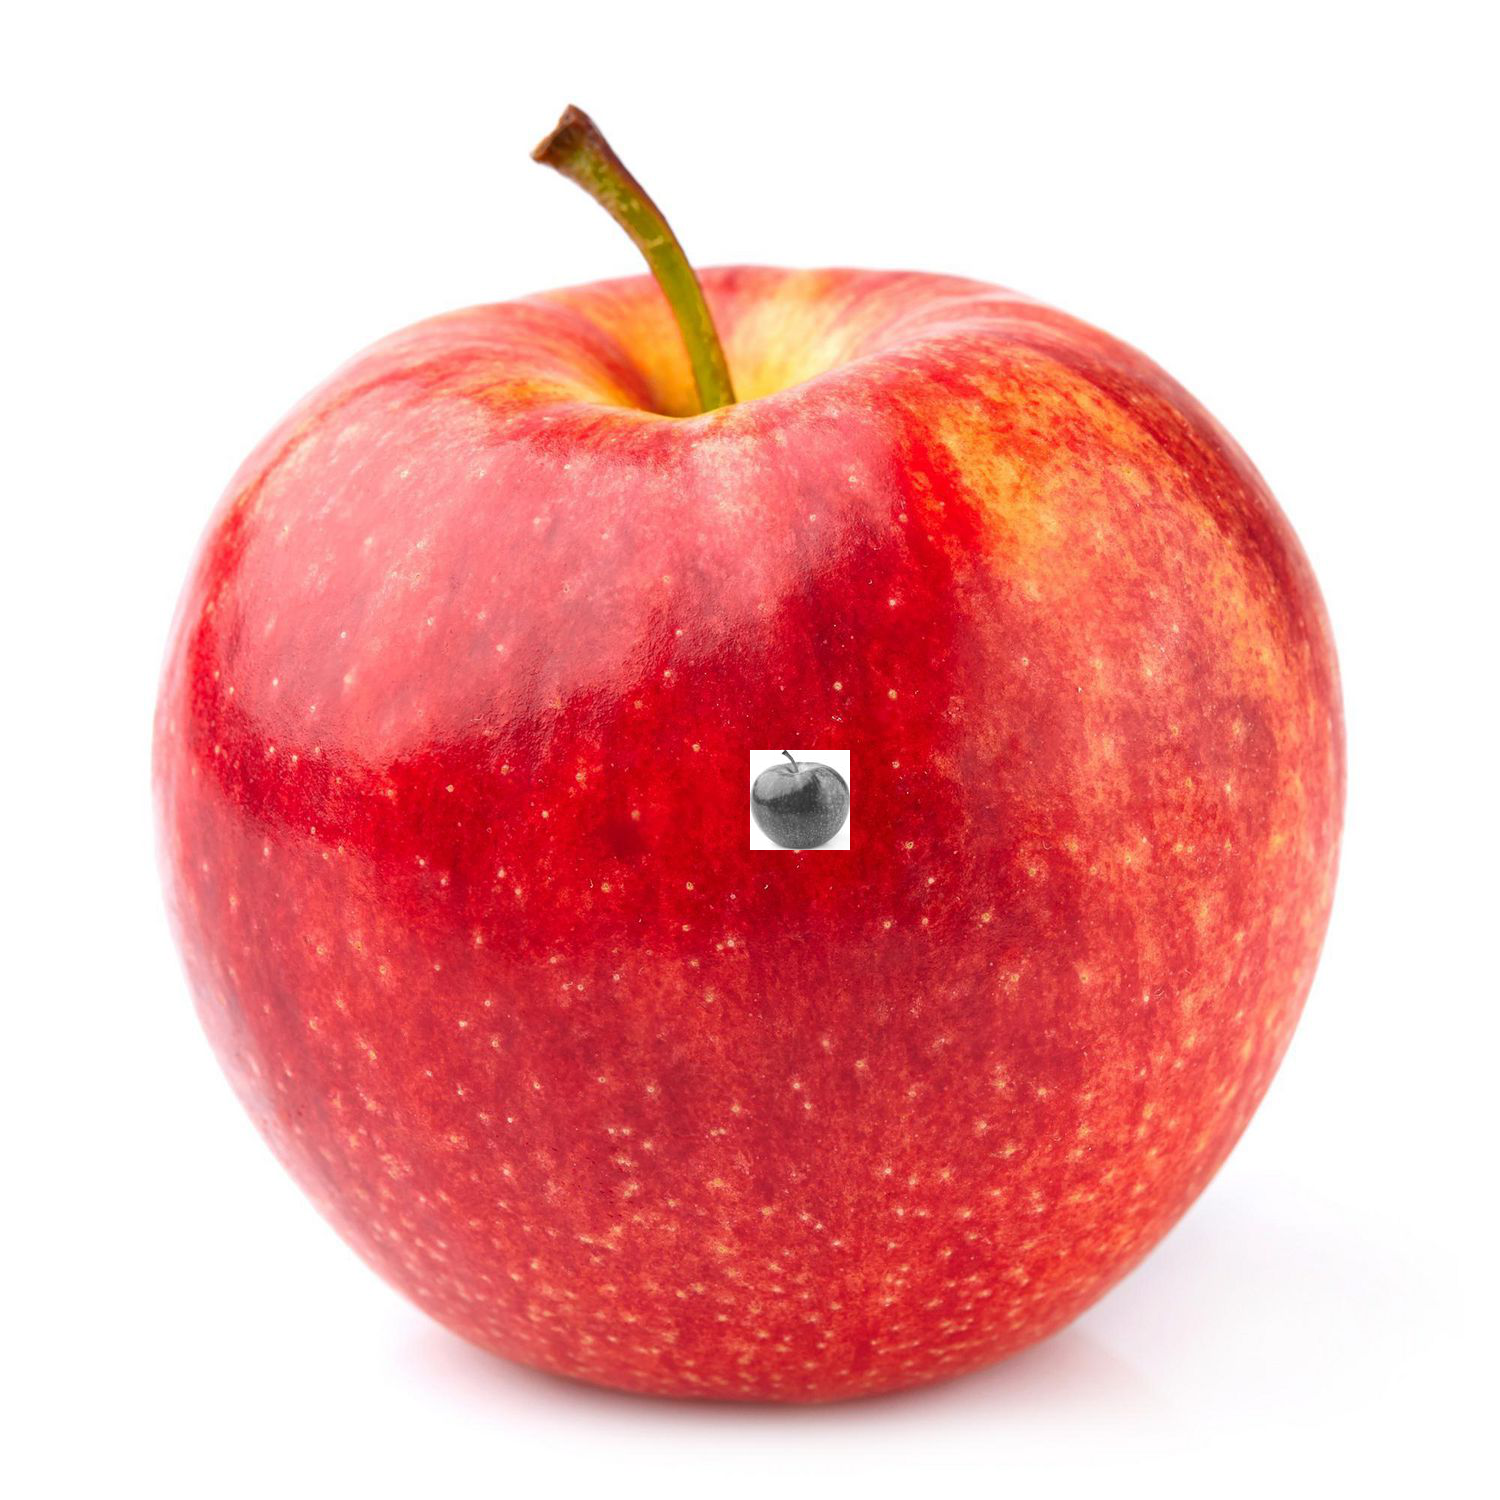

In [22]:
im1

In [25]:
from PIL import ImageFilter

In [26]:
im1_filter = im1.filter(ImageFilter.FIND_EDGES)

In [27]:
im1_filter.show()